In [1]:
import pandas as pd
data_frame =pd.read_excel("Telco_customer_churn.xlsx")
df_nonchunked_customers=data_frame[data_frame['Churn Label']=='No']
df_chunked_customers =data_frame[data_frame['Churn Label']=='Yes']
df_chunked_customers.to_excel("df_chunked_customers.xlsx")
df_nonchunked_customers.to_excel("df_nonchunked_customers.xlsx")

In [2]:
data_frame.info()
data_frame.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [3]:
import logging

# Configure logging
logging.basicConfig(
    filename="Work1.log",    # Log file name
    filemode="w",            # Overwrite the file each time
    level=logging.INFO,      # Set minimum level to INFO
    format="%(asctime)s - %(levelname)s - %(message)s"  # Log message format
)
data_frame.drop("Lat Long",axis=1)
logging.info("Dropped Lat Long column Successfully")
numeric_columns = df_chunked_customers.select_dtypes(include=["int64","float64"]).columns.tolist()
numeric_columns.remove("Latitude")
numeric_columns.remove("Longitude")
numeric_columns.remove("Zip Code")
numeric_columns.remove("Count")
logging.info("Removed columns are unnecessary  column They might be fall in categorical or  numeric But statistic Operation Unrelated")
numeric_columns.append("Total Charges")
# Convert 'Total Charges' to float, coercing errors if there are non-numeric values
df_chunked_customers["Total Charges"] = pd.to_numeric(df_chunked_customers["Total Charges"], errors='coerce')
logging.info("Converted  Data Type of total charges to float64")

C:\Users\Shaik Arshad\AppData\Local\Temp\ipykernel_15160\3032376815.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunked_customers["Total Charges"] = pd.to_numeric(df_chunked_customers["Total Charges"], errors='coerce')


In [4]:
#Removing Outliers
import pandas as pd
import numpy as np
from scipy import stats

def handle_outliers(df, column, method='capping', lower_percentile=0.05, upper_percentile=0.95):
    """
    Handles outliers in a DataFrame column.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column.
    - column (str): Column name to handle outliers.
    - method (str): 'capping', 'median', 'log', or 'boxcox'.
    - lower_percentile (float): Lower percentile for capping (default 0.05).
    - upper_percentile (float): Upper percentile for capping (default 0.95).
    
    Returns:
    - pd.DataFrame: DataFrame with outliers handled.
    """
    df_copy = df.copy()
    
    if method == 'capping':
        lower_bound = df_copy[column].quantile(lower_percentile)
        upper_bound = df_copy[column].quantile(upper_percentile)
        df_copy[column] = np.where(df_copy[column] > upper_bound, upper_bound, df_copy[column])
        df_copy[column] = np.where(df_copy[column] < lower_bound, lower_bound, df_copy[column])
    
    elif method == 'median':
        median = df_copy[column].median()
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_copy[column] = np.where(df_copy[column] > upper_bound, median, df_copy[column])
        df_copy[column] = np.where(df_copy[column] < lower_bound, median, df_copy[column])
    
    elif method == 'log':
        # Add 1 to avoid log(0)
        df_copy[column] = np.log1p(df_copy[column])
    
    elif method == 'boxcox':
        # Box-Cox requires all positive values
        if (df_copy[column] <= 0).any():
            df_copy[column] = df_copy[column] - df_copy[column].min() + 1
        df_copy[column], _ = stats.boxcox(df_copy[column])
    
    else:
        raise ValueError("Method must be 'capping', 'median', 'log', or 'boxcox'.")
    
    return df_copy


In [5]:
df_copy = handle_outliers(df_chunked_customers, numeric_columns, method='capping', lower_percentile=0.05, upper_percentile=0.95)
print(df_copy)

      CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
1864  1699-HPSBG      1  United States  California  Palm Springs     92264   
1865  8775-CEBBJ      1  United States  California        Seeley     92273   
1866  6894-LFHLY      1  United States  California         Vidal     92280   
1867  0639-TSIQW      1  United States  California   White Water     92282   
1868  8361-LTMKD      1  United States  California  Apple Valley     92307   

                    Lat Long   Latitude   Longitude  Gender  ..

In [6]:
categorical_columns=df_chunked_customers.select_dtypes(include="object").columns.to_list()

In [7]:
categorical_columns.remove('CustomerID')
categorical_columns.remove('Lat Long')

In [8]:
categorical_columns

['Country',
 'State',
 'City',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Reason']

In [9]:
df_Location = df_copy[["Country", "State", "City"]].drop_duplicates().reset_index(drop=True)

# Add LID column starting from 1
df_Location["LID"] = range(1, len(df_Location) + 1)

print(df_Location)



           Country       State             City  LID
0    United States  California      Los Angeles    1
1    United States  California    Beverly Hills    2
2    United States  California  Huntington Park    3
3    United States  California          Lynwood    4
4    United States  California   Marina Del Rey    5
..             ...         ...              ...  ...
828  United States  California            Poway  829
829  United States  California         Beaumont  830
830  United States  California          Cabazon  831
831  United States  California       Calipatria  832
832  United States  California        El Centro  833

[833 rows x 4 columns]


In [10]:
df_copy = df_copy.merge(df_Location, on=["Country", "State", "City"], how="left")
df_copy = df_copy.drop(columns=["Country", "State", "City"])


In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1869 non-null   object 
 1   Count              1869 non-null   int64  
 2   Zip Code           1869 non-null   int64  
 3   Lat Long           1869 non-null   object 
 4   Latitude           1869 non-null   float64
 5   Longitude          1869 non-null   float64
 6   Gender             1869 non-null   object 
 7   Senior Citizen     1869 non-null   object 
 8   Partner            1869 non-null   object 
 9   Dependents         1869 non-null   object 
 10  Tenure Months      1869 non-null   float64
 11  Phone Service      1869 non-null   object 
 12  Multiple Lines     1869 non-null   object 
 13  Internet Service   1869 non-null   object 
 14  Online Security    1869 non-null   object 
 15  Online Backup      1869 non-null   object 
 16  Device Protection  1869 

In [12]:
#categorical_columns.remove('Country')
categorical_columns.remove('City')
categorical_columns.remove('State')

In [13]:
categorical_columns.remove('Country')

In [14]:
categorical_columns

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Reason']

In [15]:
# unique values check karne ke liye
print(df_chunked_customers['Gender'].unique())

# mapping define
gender_map = {"Male": 1, "Female": 0}

# df_copy me Gender ko map karo
df_copy["Gender"] = df_copy["Gender"].map(gender_map)

print(df_copy.head())


['Male' 'Female']
   CustomerID  Count  Zip Code                Lat Long   Latitude   Longitude  \
0  3668-QPYBK      1     90003  33.964131, -118.272783  33.964131 -118.272783   
1  9237-HQITU      1     90005   34.059281, -118.30742  34.059281 -118.307420   
2  9305-CDSKC      1     90006  34.048013, -118.293953  34.048013 -118.293953   
3  7892-POOKP      1     90010  34.062125, -118.315709  34.062125 -118.315709   
4  0280-XJGEX      1     90015  34.039224, -118.266293  34.039224 -118.266293   

   Gender Senior Citizen Partner Dependents  ...  Paperless Billing  \
0       1             No      No         No  ...                Yes   
1       0             No      No        Yes  ...                Yes   
2       0             No      No        Yes  ...                Yes   
3       0             No     Yes        Yes  ...                Yes   
4       1             No      No        Yes  ...                Yes   

              Payment Method Monthly Charges Total Charges Churn Lab

In [16]:
df_copy["Senior Citizen"].unique()
citizen_map={"Yes":1,"No":0}
df_copy["Senior Citizen"]=df_copy["Senior Citizen"].map(citizen_map)


In [17]:
df_copy["Partner"].unique()
citizen_Partnership={"Yes":1,"No":0}
df_copy["Partner"]=df_copy["Partner"].map(citizen_map)

In [18]:
df_copy["Dependents"].unique()
isdependent={"Yes":1,"No":0}
df_copy["Dependents"]=df_copy["Dependents"].map(isdependent)

In [19]:
categorical_columns

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Reason']

In [20]:
df_copy["Phone Service"].unique()
isphoneservice={"Yes":1,"No":0}
df_copy["Phone Service"]=df_copy["Phone Service"].map(isphoneservice)

In [21]:
df_copy["Multiple Lines"].unique()
is_ML={"Yes":2,"No":1,"No phone service":0}
df_copy["Multiple Lines"]=df_copy["Multiple Lines"].map(is_ML)

In [22]:
df_copy["Internet Service"].unique()
isit={'DSL':2,'Fiber optic':1,'No':0}
df_copy["Internet Service"]=df_copy["Internet Service"].map(isit)

In [23]:
df_copy["Online Security"].unique()
is_Os ={'Yes':2,'No':1,'No internet service':0}
df_copy["Online Security"]=df_copy["Online Security"].map(is_Os)

In [24]:
categorical_columns

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Reason']

In [25]:
df_copy["Online Backup"].unique()
is_Ob ={'Yes':2,'No':1,'No internet service':0}
df_copy["Online Backup"]=df_copy["Online Backup"].map(is_Ob)

In [26]:
df_copy["Device Protection"].unique()
is_Ob ={'Yes':2,'No':1,'No internet service':0}
df_copy["Device Protection"]=df_copy["Device Protection"].map(is_Ob)

In [27]:
df_copy ['Tech Support'].unique()
is_Ob ={'Yes':2,'No':1,'No internet service':0}
df_copy['Tech Support']=df_copy['Tech Support'].map(is_Ob)

In [28]:
df_copy['Streaming TV'].unique()
is_Ob ={'Yes':2,'No':1,'No internet service':0}
df_copy['Streaming TV']=df_copy['Streaming TV'].map(is_Ob)

In [29]:
df_copy['Streaming Movies'].unique()
is_Ob ={'Yes':2,'No':1,'No internet service':0}
df_copy['Streaming Movies']=df_copy['Streaming Movies'].map(is_Ob)

In [30]:
df_copy['Contract'].unique()
is_sub={'Month-to-month':1,'One year':2,'Two year':3}
df_copy['Contract']=df_copy['Contract'].map(is_sub)

In [31]:
categorical_columns

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Reason']

In [32]:
df_copy['Paperless Billing'].unique()
iso={"Yes":1,"No":0}
df_copy['Paperless Billing']=df_copy['Paperless Billing'].map(iso)

In [33]:
df_copy['Payment Method'].unique()
h={'Mailed check':4,'Electronic check':3,'Bank transfer (automatic)':1,'Credit card (automatic)':2}
df_copy['Payment Method']=df_copy['Payment Method'].map(h)

In [34]:
df_copy['Churn Label']=df_copy['Churn Label'].map(iso)

In [35]:
d=df_copy['Churn Reason'].unique().tolist()
k={}
j=1
for i in d:
    k[i]=j
    j+=1


In [36]:
df_copy['Churn Reason']=df_copy['Churn Reason'].map(k)

In [37]:
df_copy.to_excel("df_cleaned.xlsx")
df_copy["Senior Citizen"]

0       0
1       0
2       0
3       0
4       0
       ..
1864    0
1865    0
1866    1
1867    0
1868    1
Name: Senior Citizen, Length: 1869, dtype: int64

In [38]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1869 non-null   object 
 1   Count              1869 non-null   int64  
 2   Zip Code           1869 non-null   int64  
 3   Lat Long           1869 non-null   object 
 4   Latitude           1869 non-null   float64
 5   Longitude          1869 non-null   float64
 6   Gender             1869 non-null   int64  
 7   Senior Citizen     1869 non-null   int64  
 8   Partner            1869 non-null   int64  
 9   Dependents         1869 non-null   int64  
 10  Tenure Months      1869 non-null   float64
 11  Phone Service      1869 non-null   int64  
 12  Multiple Lines     1869 non-null   int64  
 13  Internet Service   1869 non-null   int64  
 14  Online Security    1869 non-null   int64  
 15  Online Backup      1869 non-null   int64  
 16  Device Protection  1869 

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


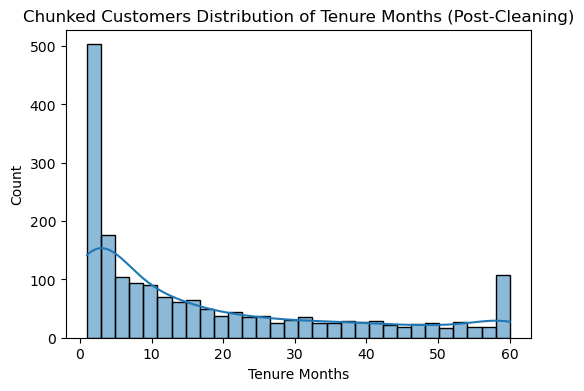

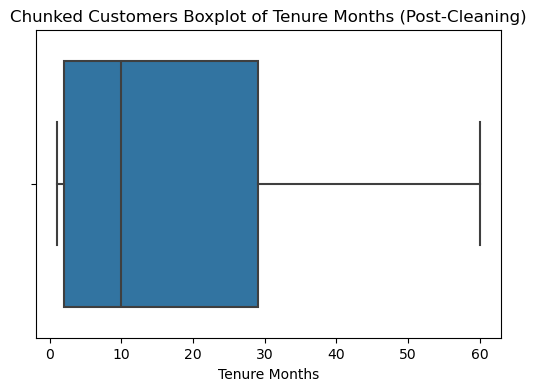

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


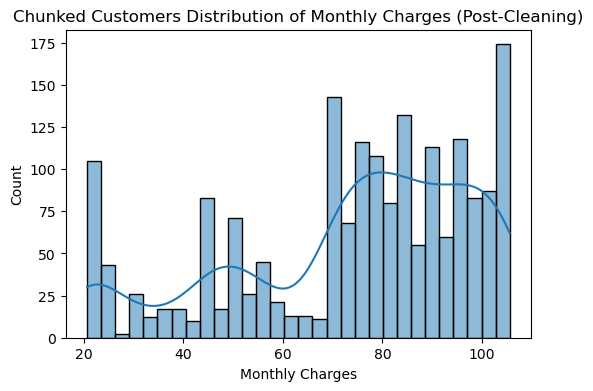

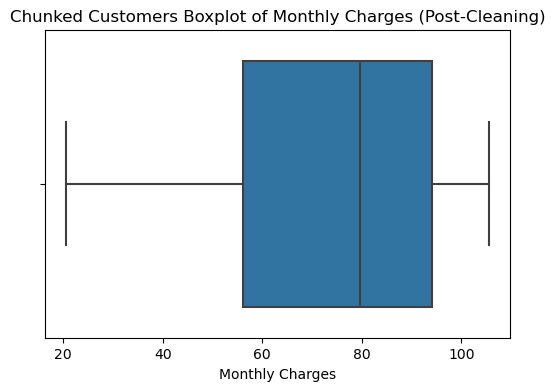

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


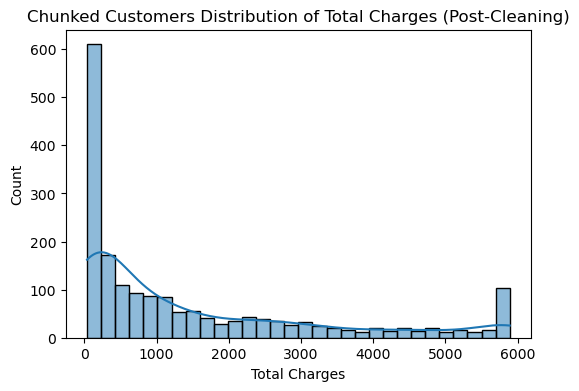

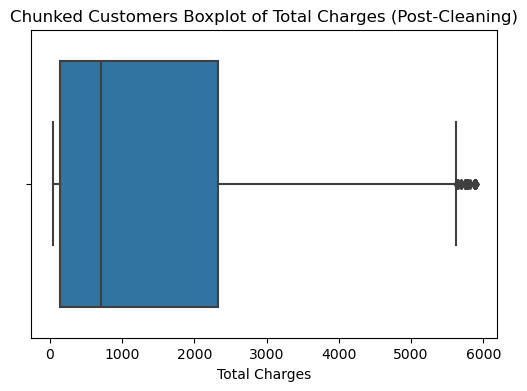

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


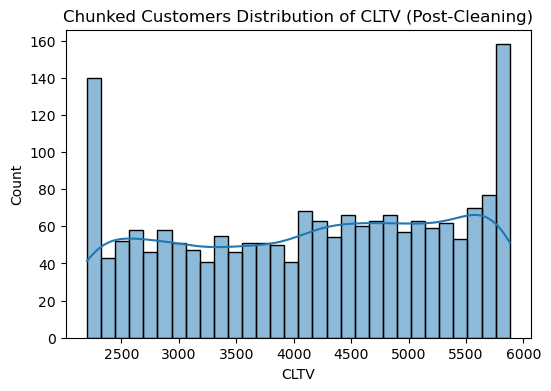

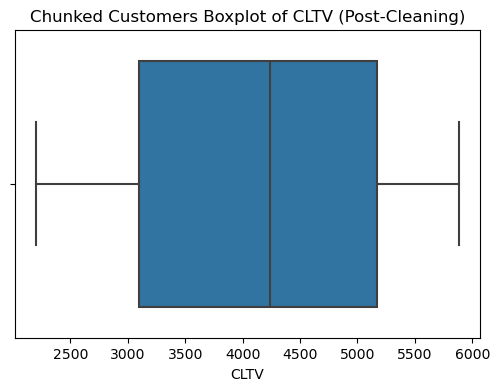

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
num_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# Plot histograms + KDE (distribution) and Boxplots
for col in num_cols:
    # Histogram + KDE
    plt.figure(figsize=(6,4))
    sns.histplot(df_copy[col], kde=True, bins=30)
    plt.title(f"Chunked Customers Distribution of {col} (Post-Cleaning)")
    plt.savefig(f"Chunked_Customers distribution_{col.replace(' ', '_')}.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_copy[col])
    plt.title(f"Chunked Customers Boxplot of {col} (Post-Cleaning)")
    plt.savefig(f"Chunked_Customers boxplot_{col.replace(' ', '_')}.png", dpi=300, bbox_inches="tight")
    plt.show()



In [40]:
df_chunked_customers['CLTV'].median()

4238.0

In [41]:
df_chunked_customers['Total Charges'].median()

703.55

In [42]:
df_nonchunked_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5174 entries, 1869 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5174 non-null   object 
 1   Count              5174 non-null   int64  
 2   Country            5174 non-null   object 
 3   State              5174 non-null   object 
 4   City               5174 non-null   object 
 5   Zip Code           5174 non-null   int64  
 6   Lat Long           5174 non-null   object 
 7   Latitude           5174 non-null   float64
 8   Longitude          5174 non-null   float64
 9   Gender             5174 non-null   object 
 10  Senior Citizen     5174 non-null   object 
 11  Partner            5174 non-null   object 
 12  Dependents         5174 non-null   object 
 13  Tenure Months      5174 non-null   int64  
 14  Phone Service      5174 non-null   object 
 15  Multiple Lines     5174 non-null   object 
 16  Internet Service   5174 no

In [43]:
df_nonchunked_customers["Total Charges"].isnull().sum()

0

In [44]:
# 1️⃣ Drop Lat Long
df_non_chunked_customers = df_nonchunked_customers.copy()  # ensure separate copy
df_non_chunked_customers = df_non_chunked_customers.drop("Lat Long", axis=1)
logging.info("Dropped Lat Long column Successfully")
logging.info("Removed unrelated numeric columns")


# Convert with error handling
df_non_chunked_customers["Total Charges"] = pd.to_numeric(
    df_non_chunked_customers["Total Charges"], errors="coerce"
)
logging.info("Converted Data Type of Total Charges to float64")

# Check invalid entries if needed
invalid_rows = df_non_chunked_customers[
    pd.to_numeric(df_non_chunked_customers["Total Charges"], errors="coerce").isnull()
]
print("Invalid rows in 'Total Charges':")
print(invalid_rows)

# 3️⃣ Handle outliers
df_non_chunked_copy = handle_outliers(
    df_non_chunked_customers, 
    numeric_columns, 
    method="capping", 
    lower_percentile=0.05, 
    upper_percentile=0.95
)

# Final info check
print(df_non_chunked_copy["Total Charges"].dtype)
df_non_chunked_copy.info()


Invalid rows in 'Total Charges':
      CustomerID  Count        Country       State            City  Zip Code  \
2234  4472-LVYGI      1  United States  California  San Bernardino     92408   
2438  3115-CZMZD      1  United States  California    Independence     93526   
2568  5709-LVOEQ      1  United States  California       San Mateo     94401   
2667  4367-NUYAO      1  United States  California       Cupertino     95014   
2856  1371-DWPAZ      1  United States  California        Redcrest     95569   
4331  7644-OMVMY      1  United States  California     Los Angeles     90029   
4687  3213-VVOLG      1  United States  California        Sun City     92585   
5104  2520-SGTTA      1  United States  California      Ben Lomond     95005   
5719  2923-ARZLG      1  United States  California        La Verne     91750   
6772  4075-WKNIU      1  United States  California            Bell     90201   
6840  2775-SEFEE      1  United States  California      Wilmington     90744   

      

In [45]:
df_Location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  833 non-null    object
 1   State    833 non-null    object
 2   City     833 non-null    object
 3   LID      833 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 26.2+ KB


In [46]:
import pandas as pd

# Step 0 – Check columns (optional but good practice)
print(df_Location.columns)
print(df_non_chunked_copy.columns)

# Step 1 – Find new locations not in df_Location
new_locations = df_non_chunked_copy.merge(
    df_Location[['Country', 'State', 'City']],  # capital letters
    on=['Country', 'State', 'City'],
    how='left',
    indicator=True
).query('_merge == "left_only"').drop(columns=['_merge'])

# Keep only unique new locations
new_locations = new_locations[['Country', 'State', 'City']].drop_duplicates().reset_index(drop=True)

# Step 2 – Assign new LID starting from max existing LID
max_lid = df_Location['LID'].max()
new_locations['LID'] = range(max_lid + 1, max_lid + 1 + len(new_locations))

# Step 3 – Combine old and new locations
df_Location_updated = pd.concat([df_Location, new_locations], ignore_index=True)

# Step 4 – Merge to assign LID to df_non_chunked_copy
df_non_chunked_copy = df_non_chunked_copy.merge(
    df_Location_updated[['Country', 'State', 'City', 'LID']],
    on=['Country', 'State', 'City'],
    how='left'
)

# Step 5 – Drop Country, State, City columns from df_non_chunked_copy
df_non_chunked_copy = df_non_chunked_copy.drop(columns=['Country', 'State', 'City'])

# ✅ Final output ready


Index(['Country', 'State', 'City', 'LID'], dtype='object')
Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Reason'],
      dtype='object')


In [47]:
# Gender
df_non_chunked_copy["Gender"] = df_non_chunked_copy["Gender"].map(gender_map)

# Senior Citizen
df_non_chunked_copy["Senior Citizen"] = df_non_chunked_copy["Senior Citizen"].map(citizen_map)

# Partner
df_non_chunked_copy["Partner"] = df_non_chunked_copy["Partner"].map(citizen_map)

# Dependents
df_non_chunked_copy["Dependents"] = df_non_chunked_copy["Dependents"].map(isdependent)

# Phone Service
df_non_chunked_copy["Phone Service"] = df_non_chunked_copy["Phone Service"].map(isphoneservice)

# Multiple Lines
df_non_chunked_copy["Multiple Lines"] = df_non_chunked_copy["Multiple Lines"].map(is_ML)

# Internet Service
df_non_chunked_copy["Internet Service"] = df_non_chunked_copy["Internet Service"].map(isit)

# Online Security
df_non_chunked_copy["Online Security"] = df_non_chunked_copy["Online Security"].map(is_Os)

# Online Backup
df_non_chunked_copy["Online Backup"] = df_non_chunked_copy["Online Backup"].map(is_Ob)

# Device Protection
df_non_chunked_copy["Device Protection"] = df_non_chunked_copy["Device Protection"].map(is_Ob)

# Tech Support
df_non_chunked_copy["Tech Support"] = df_non_chunked_copy["Tech Support"].map(is_Ob)

# Streaming TV
df_non_chunked_copy["Streaming TV"] = df_non_chunked_copy["Streaming TV"].map(is_Ob)

# Streaming Movies
df_non_chunked_copy["Streaming Movies"] = df_non_chunked_copy["Streaming Movies"].map(is_Ob)

# Contract
df_non_chunked_copy["Contract"] = df_non_chunked_copy["Contract"].map(is_sub)

# Paperless Billing
df_non_chunked_copy["Paperless Billing"] = df_non_chunked_copy["Paperless Billing"].map(iso)

# Payment Method
df_non_chunked_copy["Payment Method"] = df_non_chunked_copy["Payment Method"].map(h)

# Churn Label
df_non_chunked_copy["Churn Label"] = df_non_chunked_copy["Churn Label"].map(iso)


In [48]:
df_non_chunked_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5174 non-null   object 
 1   Count              5174 non-null   int64  
 2   Zip Code           5174 non-null   int64  
 3   Latitude           5174 non-null   float64
 4   Longitude          5174 non-null   float64
 5   Gender             5174 non-null   int64  
 6   Senior Citizen     5174 non-null   int64  
 7   Partner            5174 non-null   int64  
 8   Dependents         5174 non-null   int64  
 9   Tenure Months      5174 non-null   float64
 10  Phone Service      5174 non-null   int64  
 11  Multiple Lines     5174 non-null   int64  
 12  Internet Service   5174 non-null   int64  
 13  Online Security    5174 non-null   int64  
 14  Online Backup      5174 non-null   int64  
 15  Device Protection  5174 non-null   int64  
 16  Tech Support       5174 

In [49]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1869 non-null   object 
 1   Count              1869 non-null   int64  
 2   Zip Code           1869 non-null   int64  
 3   Lat Long           1869 non-null   object 
 4   Latitude           1869 non-null   float64
 5   Longitude          1869 non-null   float64
 6   Gender             1869 non-null   int64  
 7   Senior Citizen     1869 non-null   int64  
 8   Partner            1869 non-null   int64  
 9   Dependents         1869 non-null   int64  
 10  Tenure Months      1869 non-null   float64
 11  Phone Service      1869 non-null   int64  
 12  Multiple Lines     1869 non-null   int64  
 13  Internet Service   1869 non-null   int64  
 14  Online Security    1869 non-null   int64  
 15  Online Backup      1869 non-null   int64  
 16  Device Protection  1869 

In [50]:
df_copy = df_copy.drop(columns='Lat Long')


In [51]:
df_copy.columns

Index(['CustomerID', 'Count', 'Zip Code', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'LID'],
      dtype='object')

In [52]:
df_non_chunked_copy["Churn Reason"].fillna(0, inplace=True)

In [53]:
# Check how many null values are present
df_non_chunked_copy["Total Charges"].isnull().sum()

# Fill missing values with 0
df_non_chunked_copy["Total Charges"].fillna(0, inplace=True)


In [54]:
df_combined = pd.concat([df_copy, df_non_chunked_copy], ignore_index=True)

In [55]:
df_non_chunked_copy.columns


Index(['CustomerID', 'Count', 'Zip Code', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'LID'],
      dtype='object')

In [56]:
null_columns = df_combined.columns[df_combined.isnull().any()].tolist()
print("Columns with null values:", null_columns)


Columns with null values: []


In [57]:
df_copy.to_excel("Final_Chunked_Customers.xlsx",index=True)
df_combined.to_excel("Final_Complete_cleaned.xlsx",index =True)
df_non_chunked_copy.to_excel("Final_nonChunked_Customers.xlsx",index=True)

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


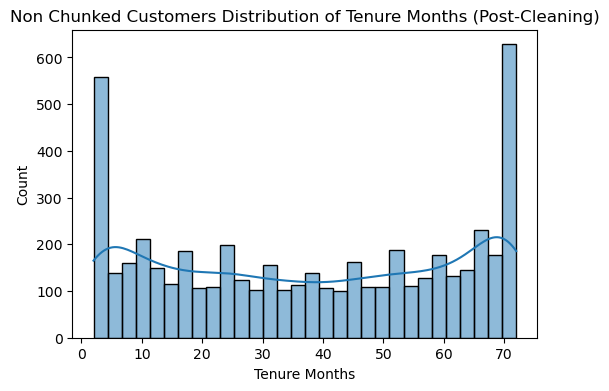

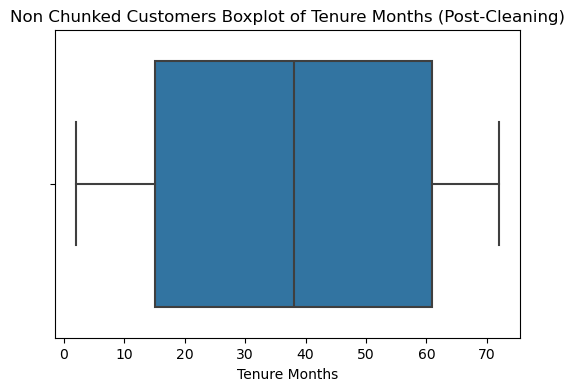

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


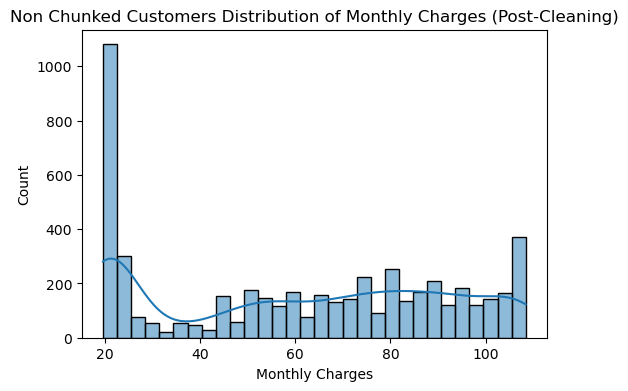

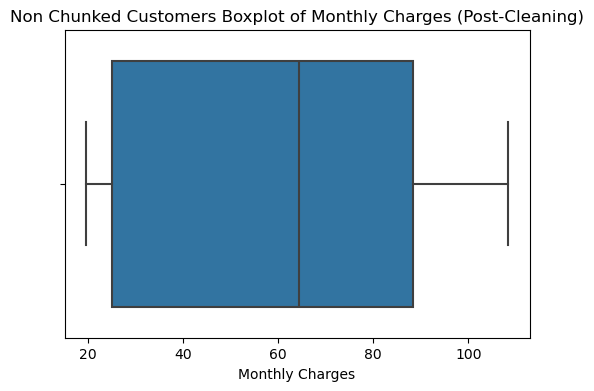

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


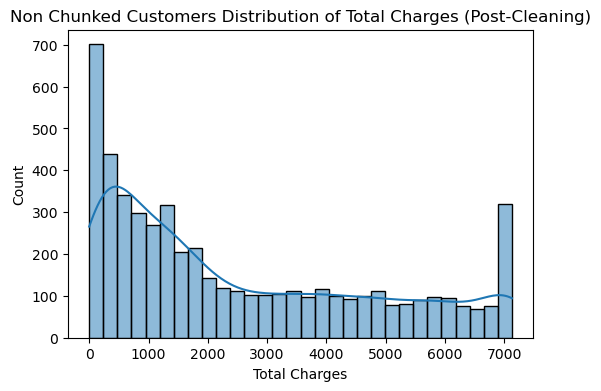

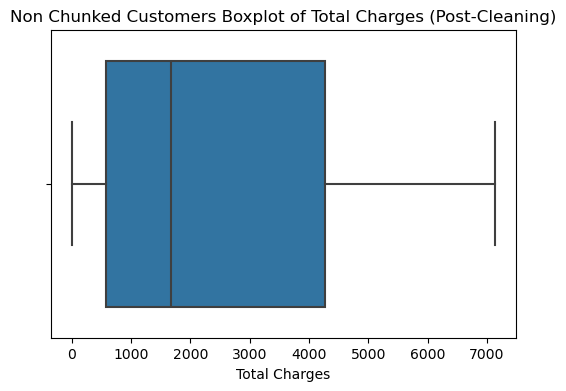

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


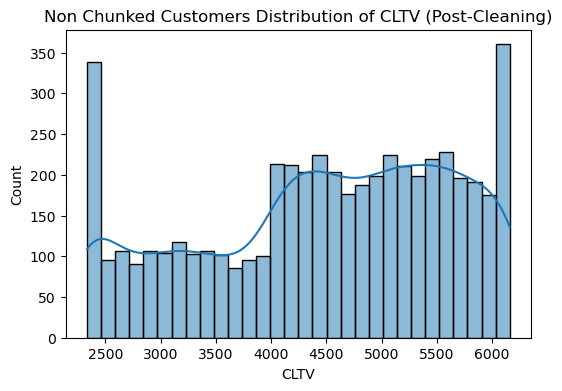

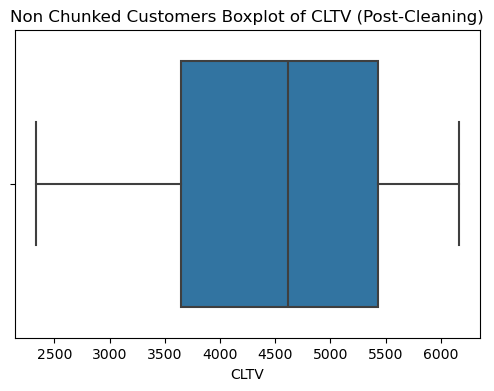

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
num_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# Plot histograms + KDE (distribution) and Boxplots
for col in num_cols:
    # Histogram + KDE
    plt.figure(figsize=(6,4))
    sns.histplot(df_non_chunked_copy[col], kde=True, bins=30)
    plt.title(f"Non Chunked Customers Distribution of {col} (Post-Cleaning)")
    plt.savefig(f"Non Chunked_Customers distribution_{col.replace(' ', '_')}.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_non_chunked_copy[col])
    plt.title(f"Non Chunked Customers Boxplot of {col} (Post-Cleaning)")
    plt.savefig(f"Non Chunked_Customers boxplot_{col.replace(' ', '_')}.png", dpi=300, bbox_inches="tight")
    plt.show()



c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


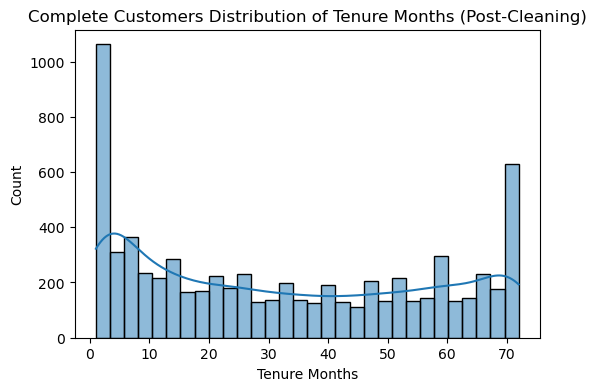

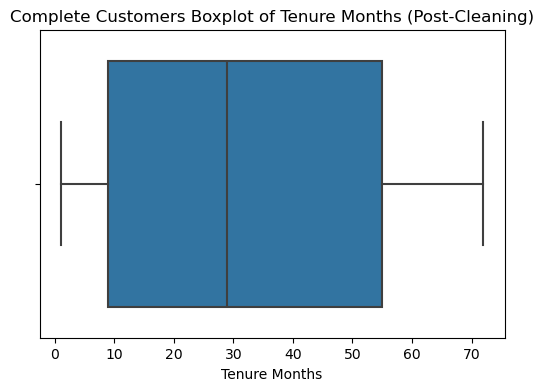

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


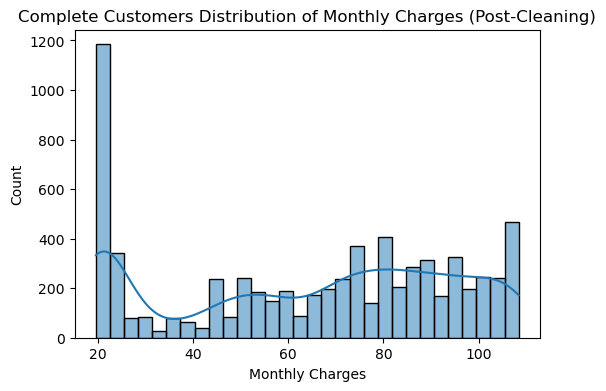

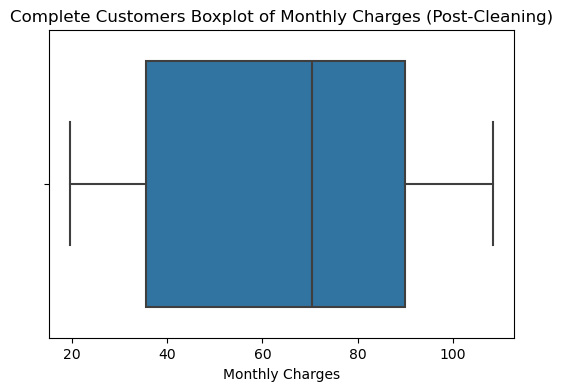

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


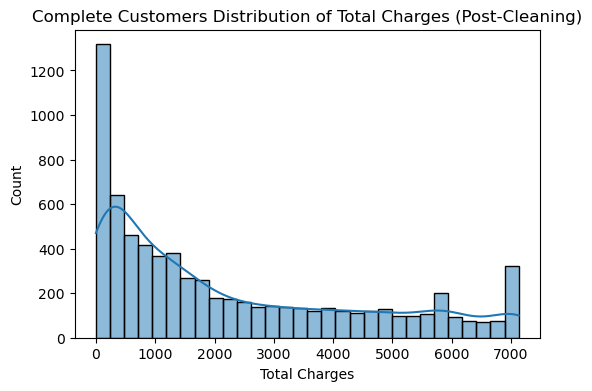

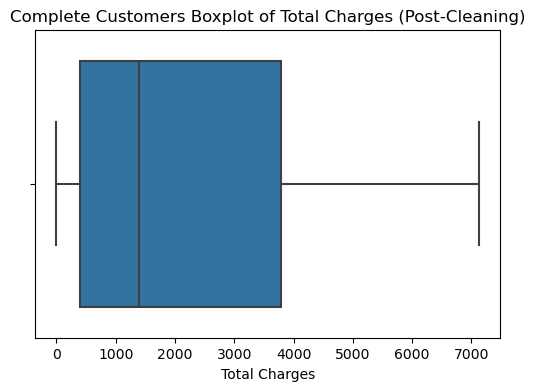

c:\Users\Shaik Arshad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


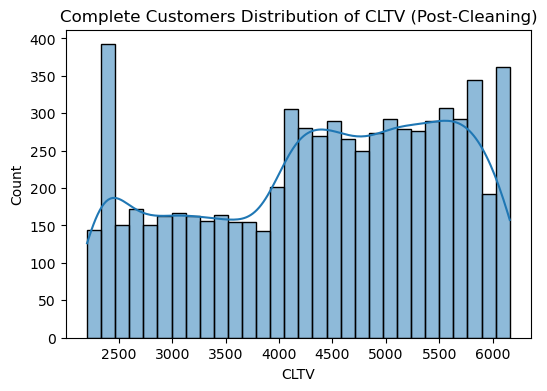

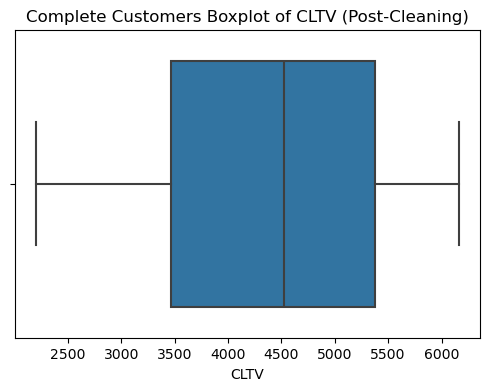

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
num_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# Plot histograms + KDE (distribution) and Boxplots
for col in num_cols:
    # Histogram + KDE
    plt.figure(figsize=(6,4))
    sns.histplot(df_combined[col], kde=True, bins=30)
    plt.title(f"Complete Customers Distribution of {col} (Post-Cleaning)")
    plt.savefig(f"Complete_Customers distribution_{col.replace(' ', '_')}.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_combined[col])
    plt.title(f"Complete Customers Boxplot of {col} (Post-Cleaning)")
    plt.savefig(f"Complete_Customers boxplot_{col.replace(' ', '_')}.png", dpi=300, bbox_inches="tight")
    plt.show()

